In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

### Reading, understanding and preparing dataset

In [57]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [212]:
df = pd.read_csv(r'C:\Users\ujjwalu\Downloads\LinearRegression\CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [213]:
# creating a new column for car company name
df['CarName'] = df['CarName'].str.split(' ',1).str[0]

In [214]:
df.head()

#checking error values
df['CarName'].unique()
#discovers spelling errors like vokswagen, vw etc.
#correcting the mistakes

def spell_check(i,o):
    df['CarName'].replace(i,o,inplace=True)
    
spell_check('vw','volkswagen')
spell_check('vokswagen','volkswagen')
spell_check('maxda','mazda')
spell_check('Nissan','nissan')
spell_check('porcshce','porsche')
spell_check('toyouta','toyota')


df['CarName'].unique()    

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [216]:
# check duplicated rows
#'symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price'
df_dup_chk= df[['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]

df_dup_chk.duplicated()

df_dup_chk.head()
#conclusion - no duplicate rows found

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# all the columns are not null constrained hence no missing values
# given dataset looks fairly proper

Visualizing the categorical variables and making inference

In [217]:
df_catg=df[['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','price']]

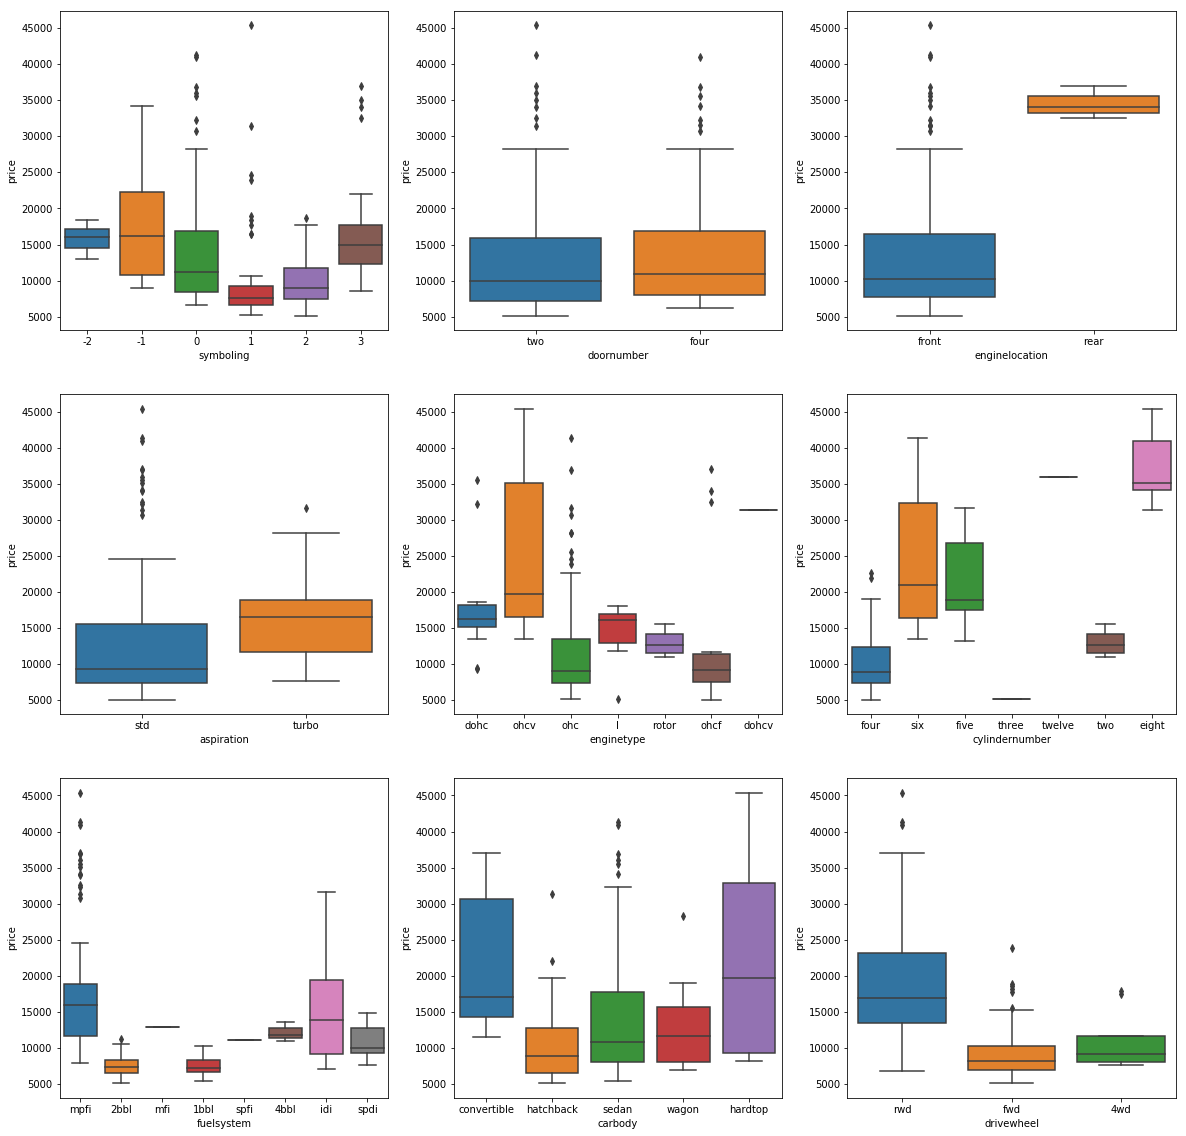

In [250]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)

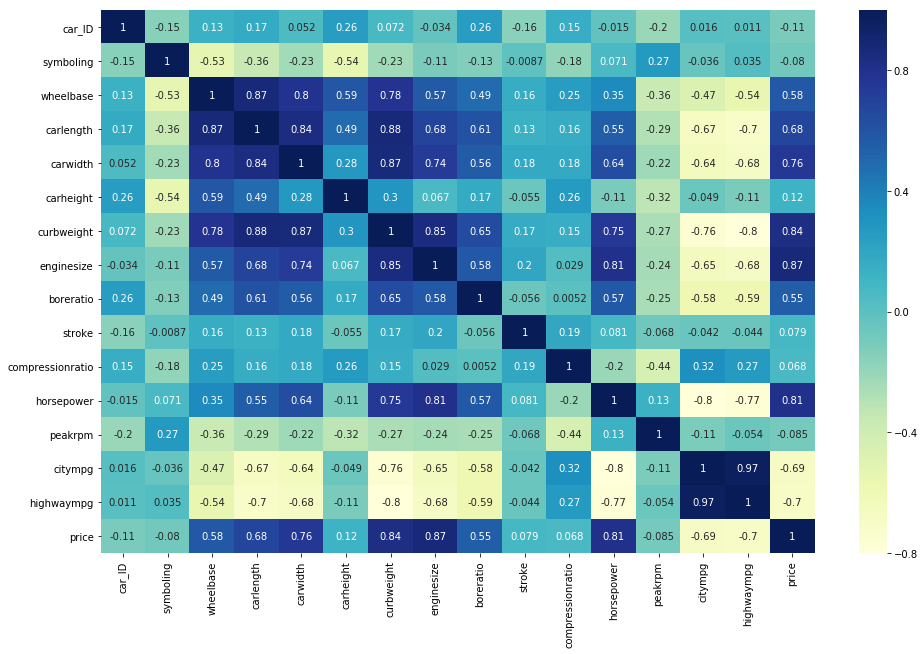

In [219]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

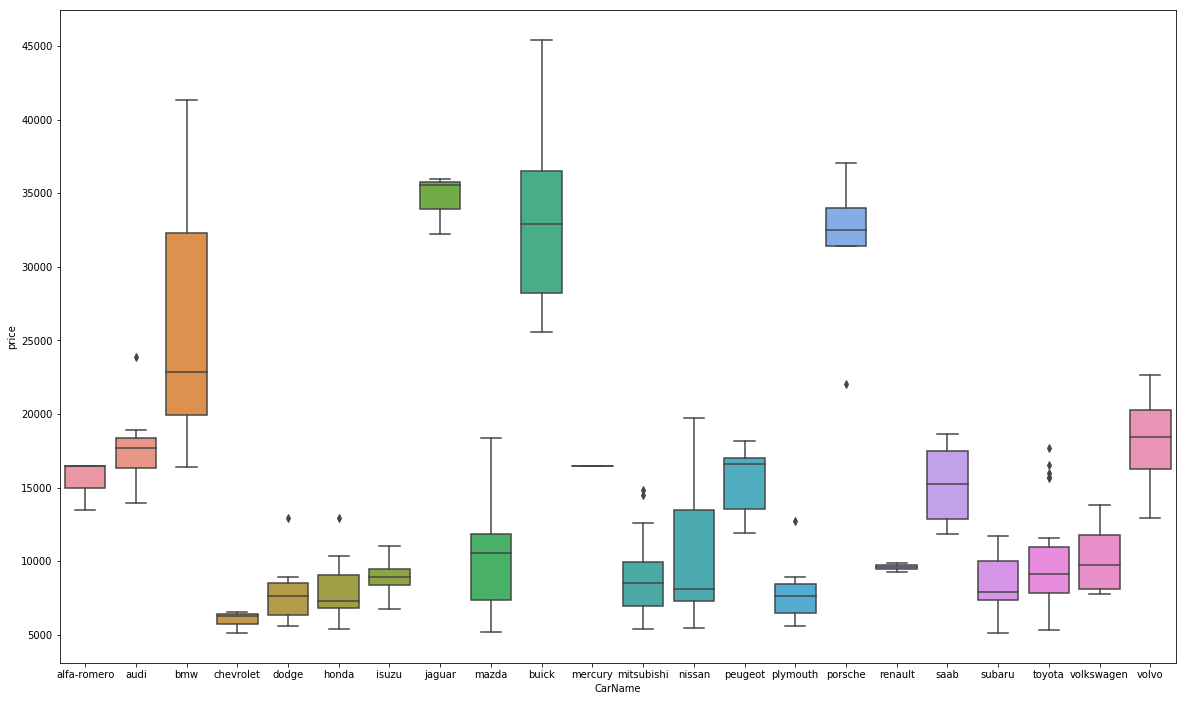

In [220]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'CarName', y = 'price', data = df)

In [221]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [222]:
Q1, Q3= np.percentile(df['price'],[25,75])
IQR = Q3 - Q1
#print(IQR)
l_IQR = Q1 - (1.5*IQR)
h_IQR = Q3 + (1.5*IQR)
print(l_IQR, h_IQR)

-5284.5 29575.5


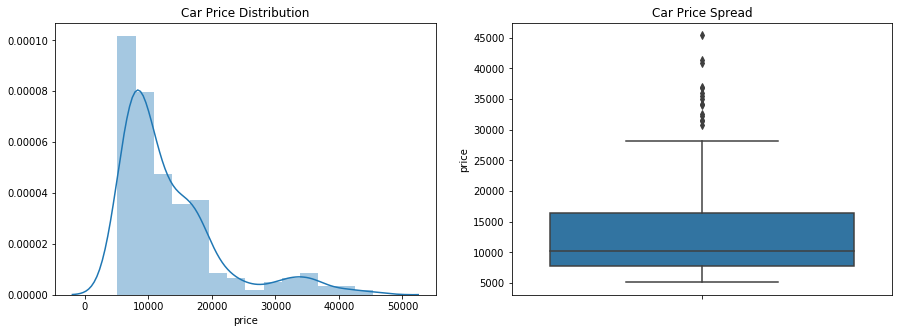

In [267]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Car Price Distribution')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

Inference :
The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
There is a significant difference between the mean(13277) and the median(10295) of the price distribution.
The data points are far spread out from the mean, which indicates a high variance in the car prices
(75% of the prices are below 16,500, whereas the remaining 25% are between 16,500 and 45,400)

We also observe the outliers to be a car priced above 29575 (using 1.5 IQR range)

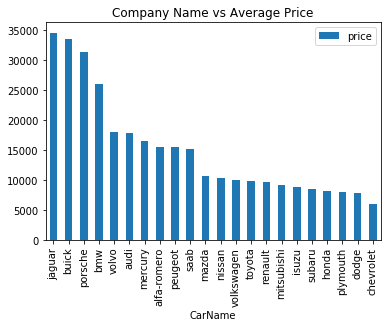

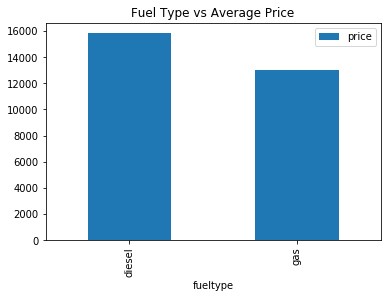

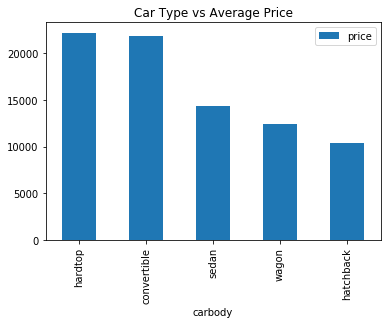

In [224]:
df_avg = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_avg.plot.bar()
plt.title('Company Name vs Average Price')

df_avg = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df_avg.plot.bar()
plt.title('Fuel Type vs Average Price')

df_avg = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_avg.plot.bar()
plt.title('Car Type vs Average Price')

plt.show()

Jaguar seems to have most espensive cars on the contrary chevrolet seems to have least expensive cars on an average
Cars having diesel engines for obvious reasons are expensive than gas engines on average
Convertible and hardtops are mostly luxury types compared to hatchback, sedan and wagon 

Visualizing numerical variables

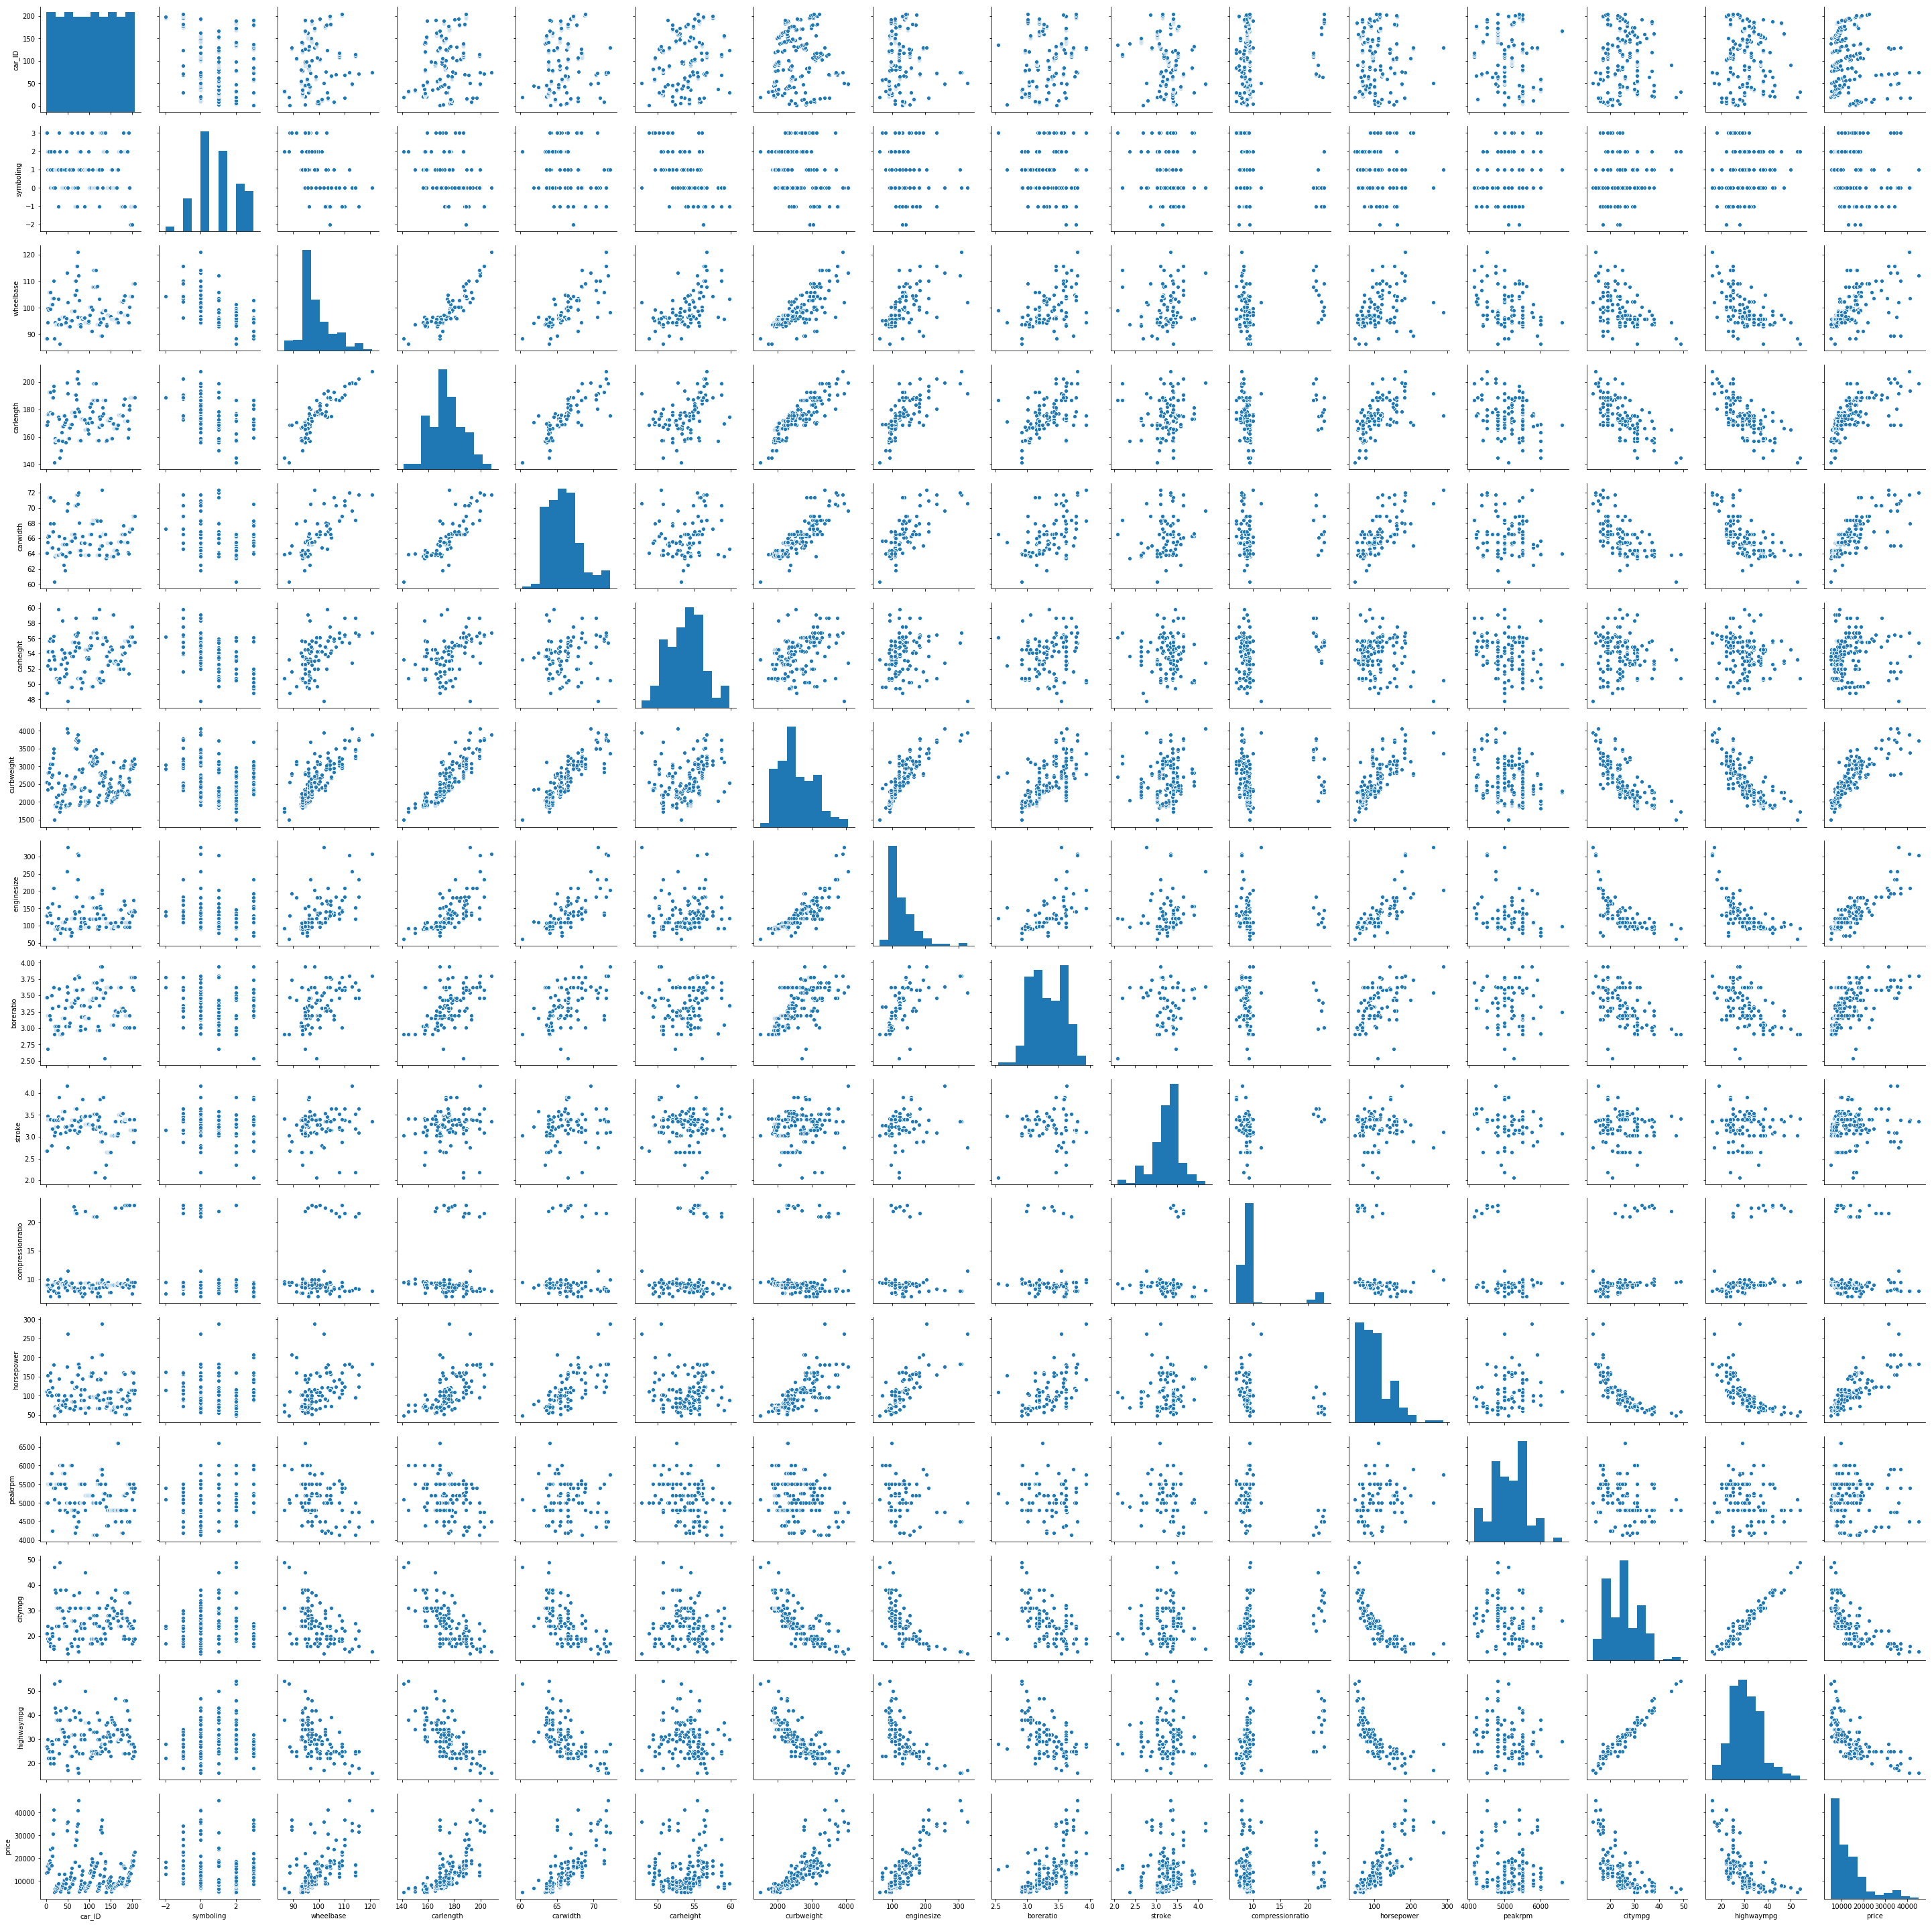

In [226]:
sns.pairplot(df)

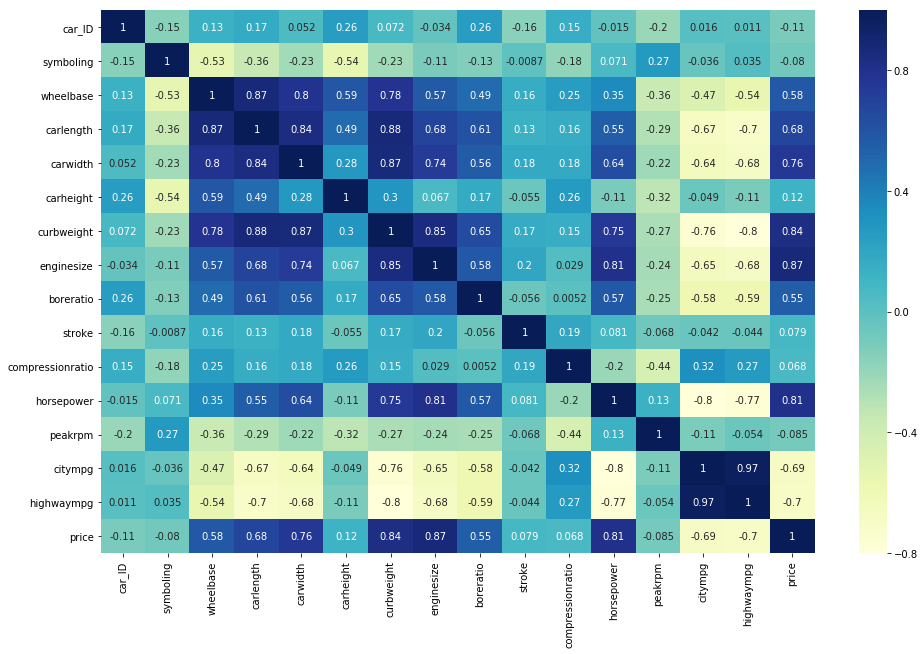

In [225]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

Inference:
The car-price seem to have a good postiv correlation with the dimensions of the car except the height.
Car's mileage is negatively correlated with the price.
Insurance risk rating seem to not have a definative correlation with the price and so is the compressionratio, stroke and peakrpm.

In [227]:
#Categorizing the car's by price to analyze the different segments:

bins = [0, 10000, 20000, 50000]
cars_bin = ['budget', 'lux', 'super-lux']

df['car_catg'] = pd.cut(df['price'], bins, labels=cars_bin)

In [252]:
# finding average mileage

df['mileage'] = (df['citympg'] + df['highwaympg'])*0.5

In [253]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_catg,mileage
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,lux,24.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,lux,24.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,lux,22.5
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,lux,27.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,lux,20.0


Bivariate Analysis

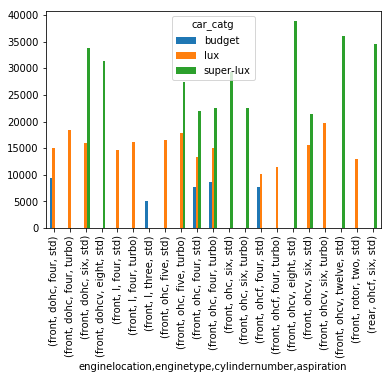

In [249]:
#df.groupby(['fuelsystem','drivewheel','fueltype','car_catg'])['price'].mean().unstack(fill_value=0).plot.bar()
#plt.title('Car Range vs Average Price')
#plt.show()

df.groupby(['enginelocation','enginetype','cylindernumber','aspiration','car_catg'])['price'].mean().unstack(fill_value=0).plot.bar()

In [251]:
df.shape

(205, 27)

In [256]:
# Regression dataframe after EDA
lr = df[['price', 'car_catg', 'carbody', 'aspiration', 'enginetype', 'cylindernumber', 'drivewheel', 'fueltype', 'enginesize', 'boreratio', 'horsepower', 'mileage', 'curbweight', 'carlength', 'carwidth', 'wheelbase']]

In [260]:
lr.shape

lr.head()

,price,car_catg,carbody,aspiration,enginetype,cylindernumber,drivewheel,fueltype,enginesize,boreratio,horsepower,mileage,curbweight,carlength,carwidth,wheelbase
0,13495.0,lux,convertible,std,dohc,four,rwd,gas,130,3.47,111,24.0,2548,168.8,64.1,88.6
1,16500.0,lux,convertible,std,dohc,four,rwd,gas,130,3.47,111,24.0,2548,168.8,64.1,88.6
2,16500.0,lux,hatchback,std,ohcv,six,rwd,gas,152,2.68,154,22.5,2823,171.2,65.5,94.5
3,13950.0,lux,sedan,std,ohc,four,fwd,gas,109,3.19,102,27.0,2337,176.6,66.2,99.8
4,17450.0,lux,sedan,std,ohc,five,4wd,gas,136,3.19,115,20.0,2824,176.6,66.4,99.4


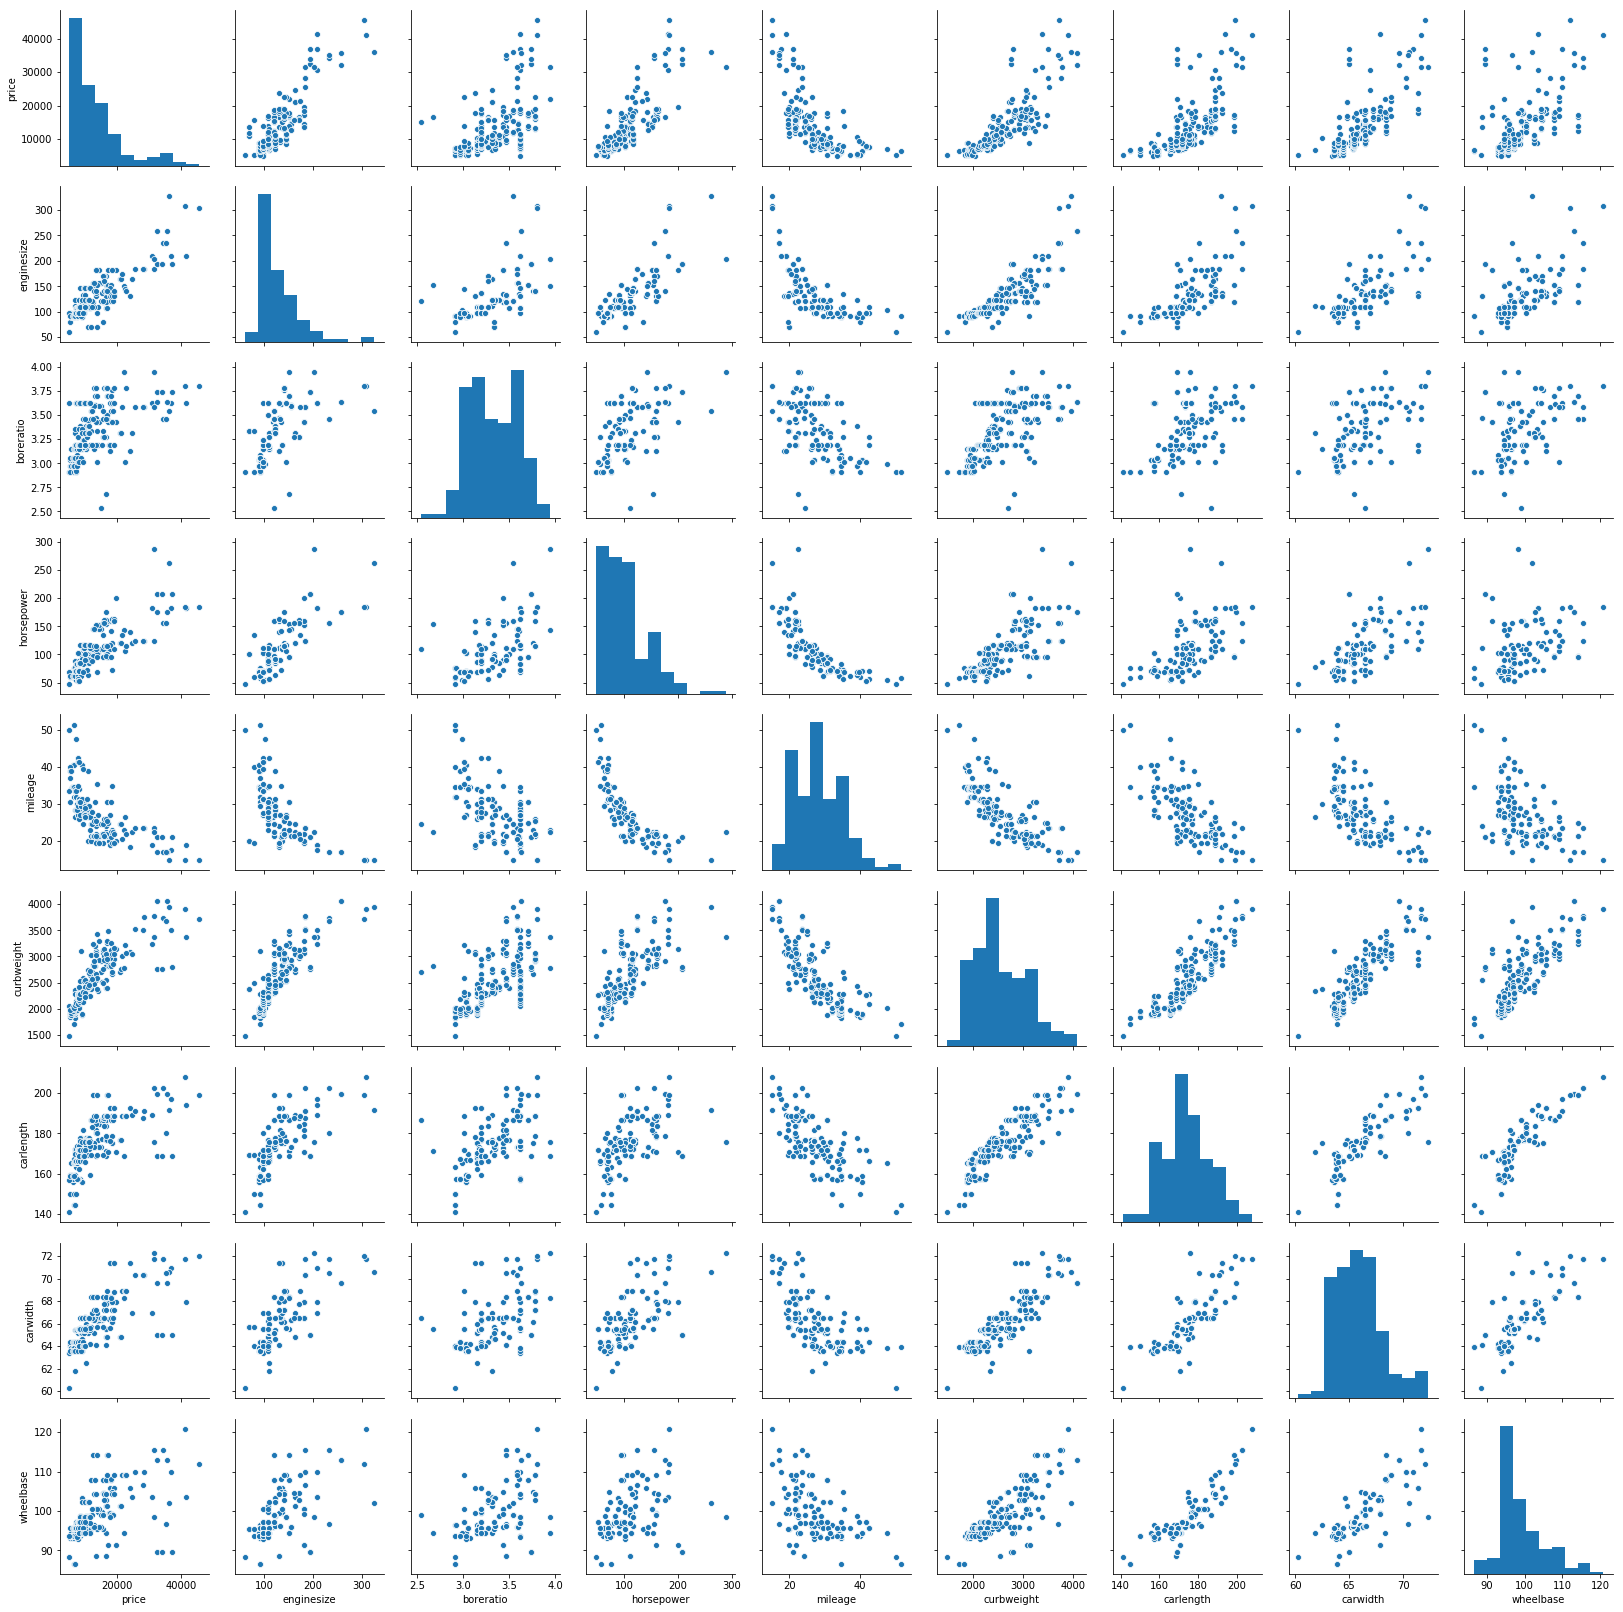

In [258]:
sns.pairplot(lr)

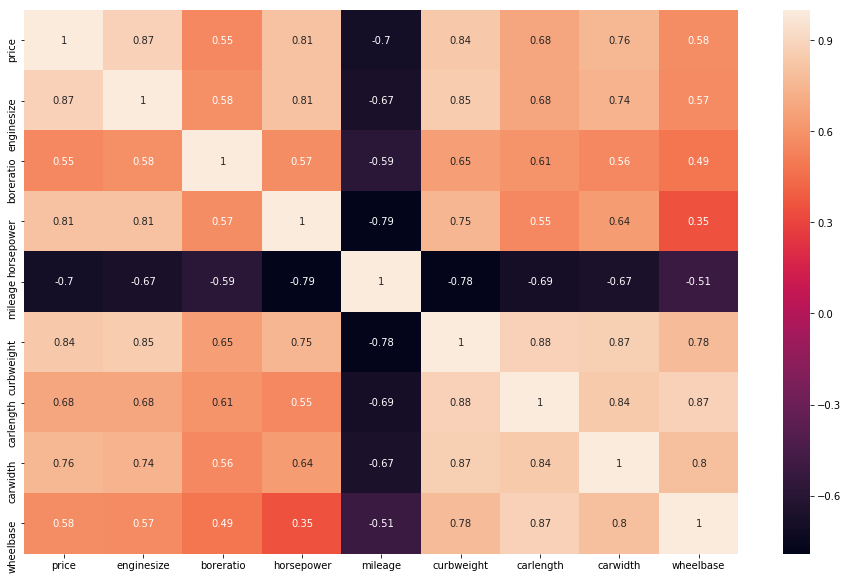

In [259]:
plt.figure(figsize = (16, 10))
sns.heatmap(lr.corr(), annot = True)

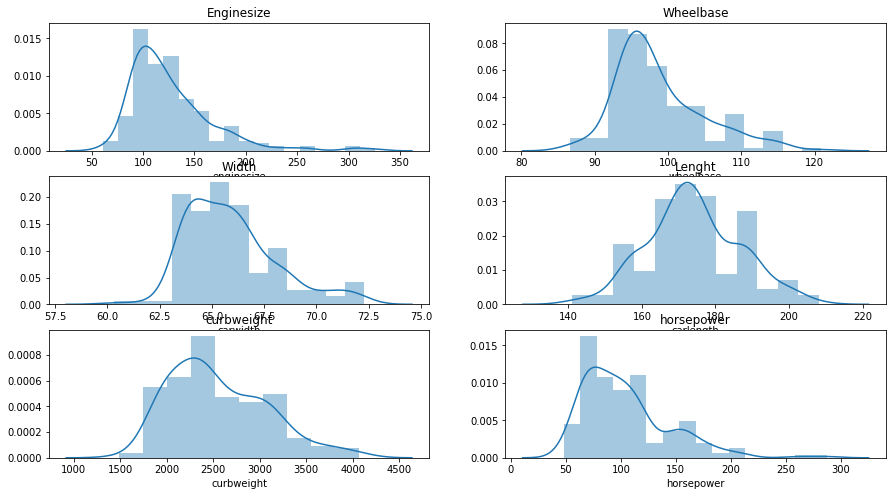

In [292]:
plt.figure(figsize = (15,8))

plt.subplot(3,2,1)
plt.title('Enginesize')
sns.distplot(lr.enginesize)

plt.subplot(3,2,2)
plt.title('Wheelbase')
sns.distplot(lr.wheelbase)

plt.subplot(3,2,3)
plt.title('Width')
sns.distplot(lr.carwidth)

plt.subplot(3,2,4)
plt.title('Lenght')
sns.distplot(lr.carlength)

plt.subplot(3,2,5)
plt.title('curbweight')
sns.distplot(lr.curbweight)

plt.subplot(3,2,6)
plt.title('horsepower')
sns.distplot(lr.horsepower)

based on the scatter plot we observe outliers mainly in curbweight, enginesize, horsepower, meanwhile using the heatmap we also observe high correlation between various variables.
lets pair the parameters while it makes sense like:
carlength-carwidth - gives us a dimesional ratio, might help in design of the new cars
curbweight-horsepower - gives us power-weight ratio

In [314]:
# outlier treatment
# 'enginesize', 'horsepower', 'curbweight', 'carlength', 'carwidth', 'wheelbase'
#lr[['enginesize', 'horsepower', 'curbweight', 'carlength', 'carwidth', 'wheelbase']]

# using 1.5IQR to find the outlier
# creating another dataframe (lr_f) for the treatment of outlier and multicollinearaity

1.0 185.0
960.0 4120.0
31.0 207.0


In [401]:
# dataframe to ignore the numerator and denominators, used in calculation for the ratio

lr_f = lr[['price', 'car_catg', 'carbody', 'aspiration', 'enginetype', 'cylindernumber', 'drivewheel', 'fueltype', 'enginesize', 'boreratio', 'horsepower', 'mileage', 'curbweight', 'carlength', 'carwidth', 'wheelbase']]

In [402]:
# reducing multicollinearity by creating new variables

lr_f['carLWratio'] = lr_f['carlength']/lr_f['carwidth']
lr_f['carPWratio'] = lr_f['horsepower']/lr_f['curbweight']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [407]:
# now dropping carlength and carwidth columns as they are highly correlated and only their 
# ratio(calculated above) would make sense in desigining the car

lr_f=lr_f.drop(['carlength','carwidth'], axis=1)

In [408]:
lr_f.head()

,price,car_catg,carbody,aspiration,enginetype,cylindernumber,drivewheel,fueltype,enginesize,boreratio,horsepower,mileage,curbweight,wheelbase,carLWratio,carPWratio
0,13495.0,lux,convertible,std,dohc,four,rwd,gas,130,3.47,111,24.0,2548,88.6,2.633385,0.043564
1,16500.0,lux,convertible,std,dohc,four,rwd,gas,130,3.47,111,24.0,2548,88.6,2.633385,0.043564
2,16500.0,lux,hatchback,std,ohcv,six,rwd,gas,152,2.68,154,22.5,2823,94.5,2.613740,0.054552
3,13950.0,lux,sedan,std,ohc,four,fwd,gas,109,3.19,102,27.0,2337,99.8,2.667674,0.043646
4,17450.0,lux,sedan,std,ohc,five,4wd,gas,136,3.19,115,20.0,2824,99.4,2.659639,0.040722


In [409]:
# using 1.5IQR to limiting the high values

Q1, Q3= np.percentile(lr_f['horsepower'],[25,75])
IQR = Q3 - Q1
#print(IQR)
l_IQR = Q1 - (1.5*IQR)
h_IQR = Q3 + (1.5*IQR)
print(l_IQR, h_IQR)

Q1, Q3= np.percentile(lr_f['curbweight'],[25,75])
IQR = Q3 - Q1
#print(IQR)
l_IQR = Q1 - (1.5*IQR)
h_IQR = Q3 + (1.5*IQR)
print(l_IQR, h_IQR)

Q1, Q3= np.percentile(lr_f['enginesize'],[25,75])
IQR = Q3 - Q1
#print(IQR)
l_IQR = Q1 - (1.5*IQR)
h_IQR = Q3 + (1.5*IQR)
print(l_IQR, h_IQR)

1.0 185.0
960.0 4120.0
31.0 207.0


In [410]:
# limiting high outlier values to the 1.5IQR range

lr_f['horsepower'][np.abs(lr_f['horsepower'] > 185.00)]= 185.00
lr_f['curbweight'][np.abs(lr_f['curbweight'] > 4120.00)]= 4120.00
lr_f['enginesize'][np.abs(lr_f['enginesize'] > 207.00)]= 207.00

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [411]:
lr_f.head()

,price,car_catg,carbody,aspiration,enginetype,cylindernumber,drivewheel,fueltype,enginesize,boreratio,horsepower,mileage,curbweight,wheelbase,carLWratio,carPWratio
0,13495.0,lux,convertible,std,dohc,four,rwd,gas,130,3.47,111,24.0,2548,88.6,2.633385,0.043564
1,16500.0,lux,convertible,std,dohc,four,rwd,gas,130,3.47,111,24.0,2548,88.6,2.633385,0.043564
2,16500.0,lux,hatchback,std,ohcv,six,rwd,gas,152,2.68,154,22.5,2823,94.5,2.613740,0.054552
3,13950.0,lux,sedan,std,ohc,four,fwd,gas,109,3.19,102,27.0,2337,99.8,2.667674,0.043646
4,17450.0,lux,sedan,std,ohc,five,4wd,gas,136,3.19,115,20.0,2824,99.4,2.659639,0.040722


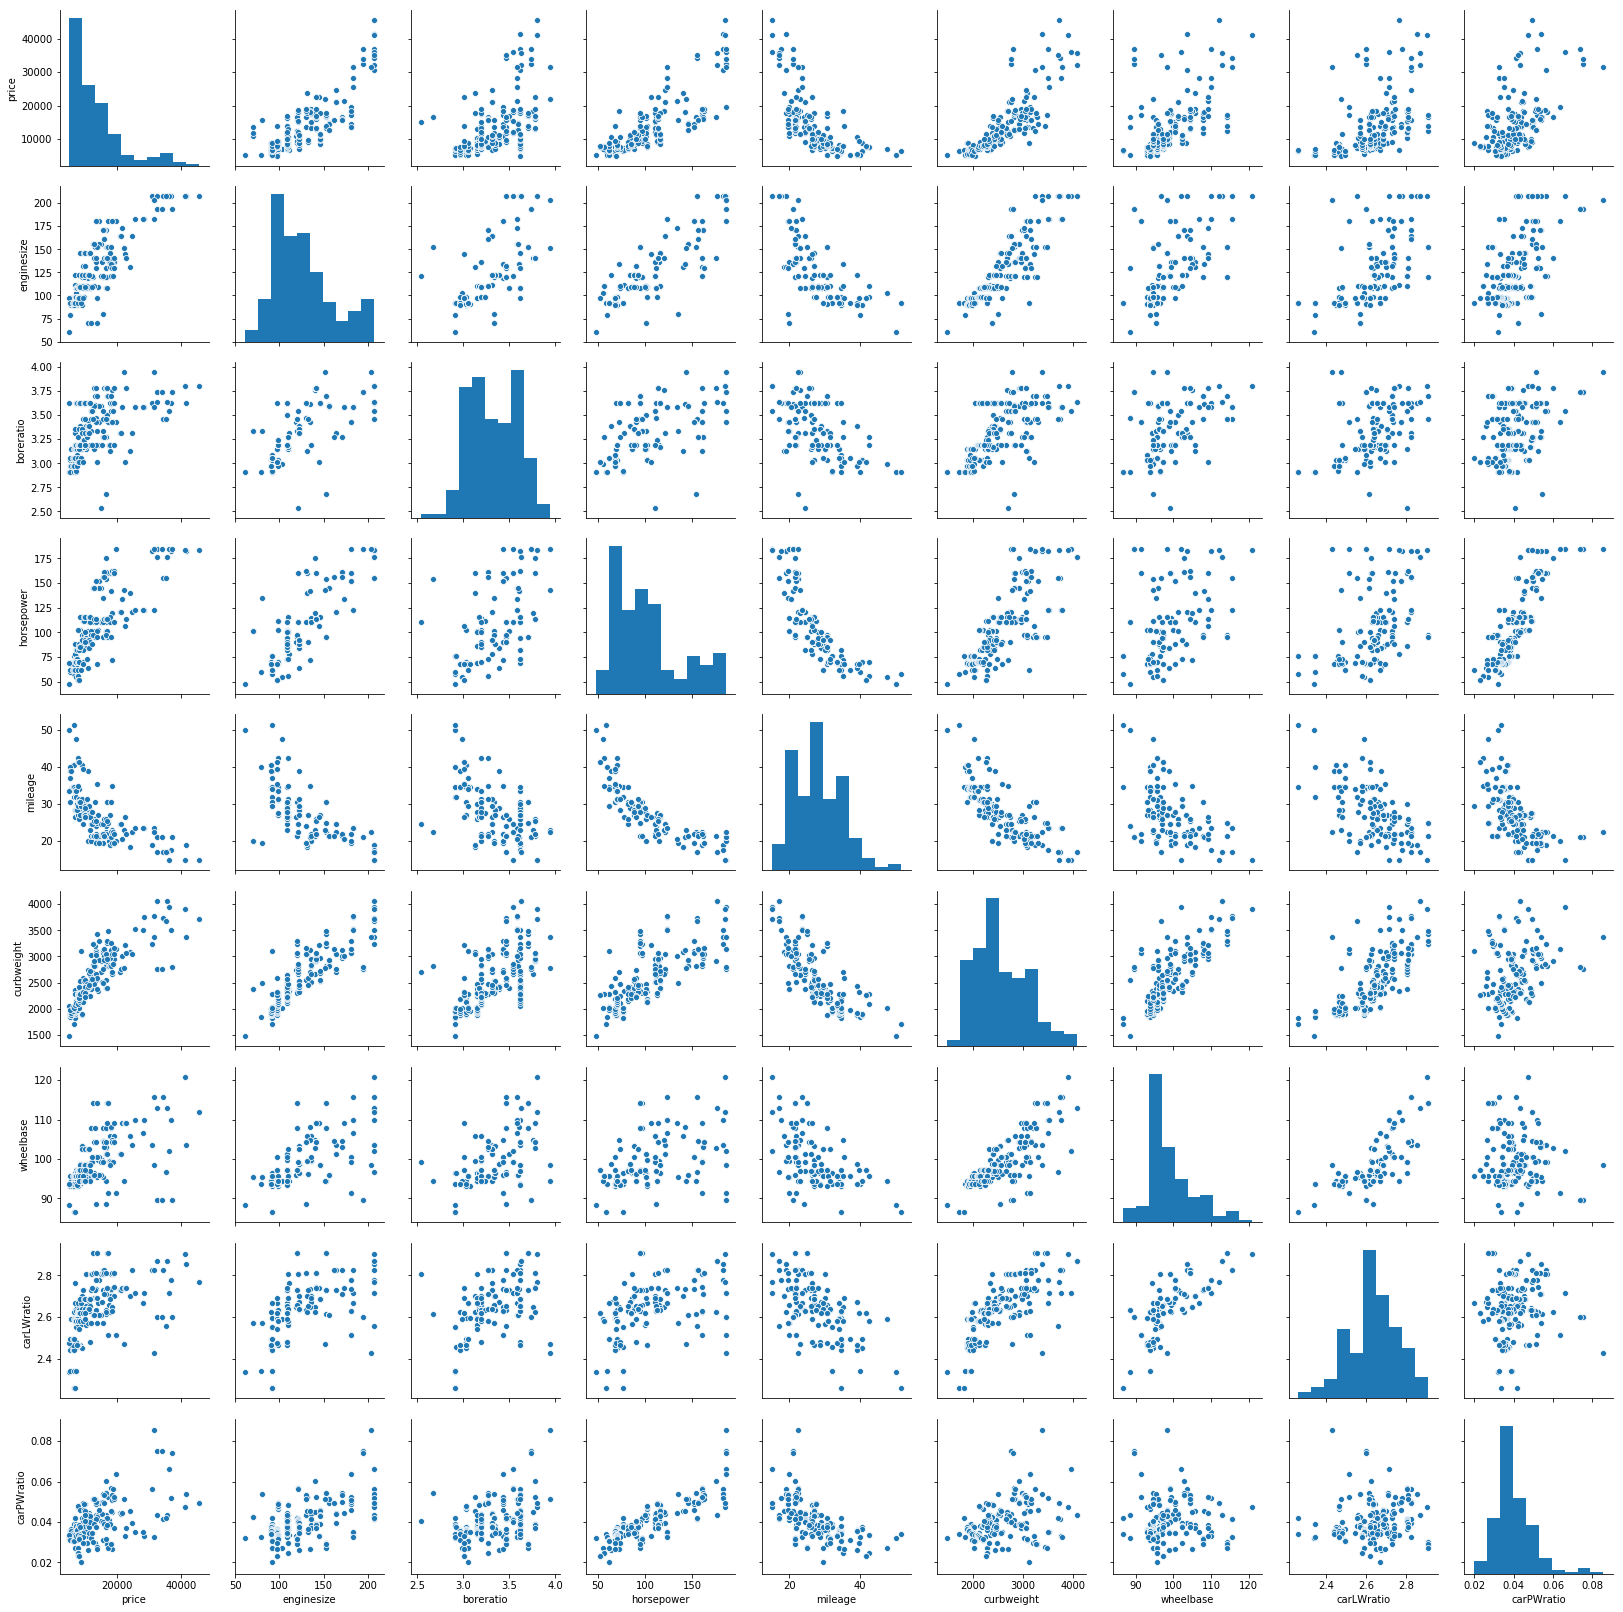

In [412]:
sns.pairplot(lr_f)

### Data Preparation

Categorical value - dummy variable treatment: 
'car_catg', 'carbody', 'aspiration','enginetype','cylindernumber','drivewheel','fueltype'

In [413]:
lr_df = lr_f

lr_df.head()

,price,car_catg,carbody,aspiration,enginetype,cylindernumber,drivewheel,fueltype,enginesize,boreratio,horsepower,mileage,curbweight,wheelbase,carLWratio,carPWratio
0,13495.0,lux,convertible,std,dohc,four,rwd,gas,130,3.47,111,24.0,2548,88.6,2.633385,0.043564
1,16500.0,lux,convertible,std,dohc,four,rwd,gas,130,3.47,111,24.0,2548,88.6,2.633385,0.043564
2,16500.0,lux,hatchback,std,ohcv,six,rwd,gas,152,2.68,154,22.5,2823,94.5,2.613740,0.054552
3,13950.0,lux,sedan,std,ohc,four,fwd,gas,109,3.19,102,27.0,2337,99.8,2.667674,0.043646
4,17450.0,lux,sedan,std,ohc,five,4wd,gas,136,3.19,115,20.0,2824,99.4,2.659639,0.040722


In [414]:
def prep_dummy(var, df):
    temp= pd.get_dummies(df[var], drop_first = True)
    df = pd.concat([df, temp], axis=1)
    df.drop([var], axis = 1, inplace = True)
    return df

lst = ['car_catg', 'carbody', 'aspiration','enginetype','cylindernumber','drivewheel','fueltype']

for i in lst:
    lr_df = prep_dummy(i, lr_df)

In [419]:
lr_df.shape

cars=lr_df

cars.shape

(205, 31)

### Splitting the Data into Training and Testing Sets

In [420]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [421]:
print(df_train.shape)
print(df_test.shape)

(143, 31)
(62, 31)


In [422]:
df_train.head()

,price,enginesize,boreratio,horsepower,mileage,curbweight,wheelbase,carLWratio,carPWratio,lux,super-lux,hardtop,hatchback,sedan,wagon,turbo,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,fwd,rwd,gas
122,7609.0,98,2.97,68,34.5,2191,93.7,2.622257,0.031036,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
125,22018.0,151,3.94,143,23.0,2778,94.5,2.472914,0.051476,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1
166,9538.0,98,3.24,112,27.5,2300,94.5,2.635937,0.048696,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,16500.0,130,3.47,111,24.0,2548,88.6,2.633385,0.043564,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
199,18950.0,130,3.62,162,19.5,3157,104.3,2.809524,0.051315,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1


#### Scaling the features

In [423]:
from sklearn.preprocessing import MinMaxScaler

In [424]:
scaler = MinMaxScaler()

In [425]:
# need to apply scaling to all columns which are not converted to dummy variables as they differ in scale (mostly numerical variables)

lst = ['price', 'enginesize', 'boreratio', 'horsepower', 'mileage', 'curbweight', 'wheelbase', 'carLWratio', 'carPWratio']

df_train[lst] = scaler.fit_transform(df_train[lst])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [426]:
df_train.head()

,price,enginesize,boreratio,horsepower,mileage,curbweight,wheelbase,carLWratio,carPWratio,lux,super-lux,hardtop,hatchback,sedan,wagon,turbo,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,fwd,rwd,gas
122,0.068818,0.253425,0.230159,0.145985,0.534247,0.272692,0.244828,0.557140,0.169146,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
125,0.466890,0.616438,1.000000,0.693431,0.219178,0.500388,0.272414,0.325594,0.480607,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1
166,0.122110,0.253425,0.444444,0.467153,0.342466,0.314973,0.272414,0.578350,0.438242,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,0.314446,0.472603,0.626984,0.459854,0.246575,0.411171,0.068966,0.574393,0.360040,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
199,0.382131,0.472603,0.746032,0.832117,0.123288,0.647401,0.610345,0.847483,0.478148,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1


In [427]:
df_train.describe()

,price,enginesize,boreratio,horsepower,mileage,curbweight,wheelbase,carLWratio,carPWratio,lux,super-lux,hardtop,hatchback,sedan,wagon,turbo,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,fwd,rwd,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.424705,0.497946,0.387117,0.359805,0.407878,0.411141,0.571441,0.301305,0.363636,0.139860,0.020979,0.342657,0.475524,0.132867,0.181818,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.594406,0.349650,0.909091
std,0.215682,0.237856,0.207140,0.253079,0.186087,0.211269,0.205581,0.194278,0.139794,0.482737,0.348061,0.143818,0.476266,0.501156,0.340624,0.387050,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.492733,0.478536,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.246575,0.305556,0.160584,0.205479,0.245539,0.272414,0.474597,0.218294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.140343,0.335616,0.500000,0.335766,0.342466,0.355702,0.341379,0.578350,0.268725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.313479,0.547945,0.682540,0.496350,0.513699,0.559542,0.503448,0.701553,0.360401,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


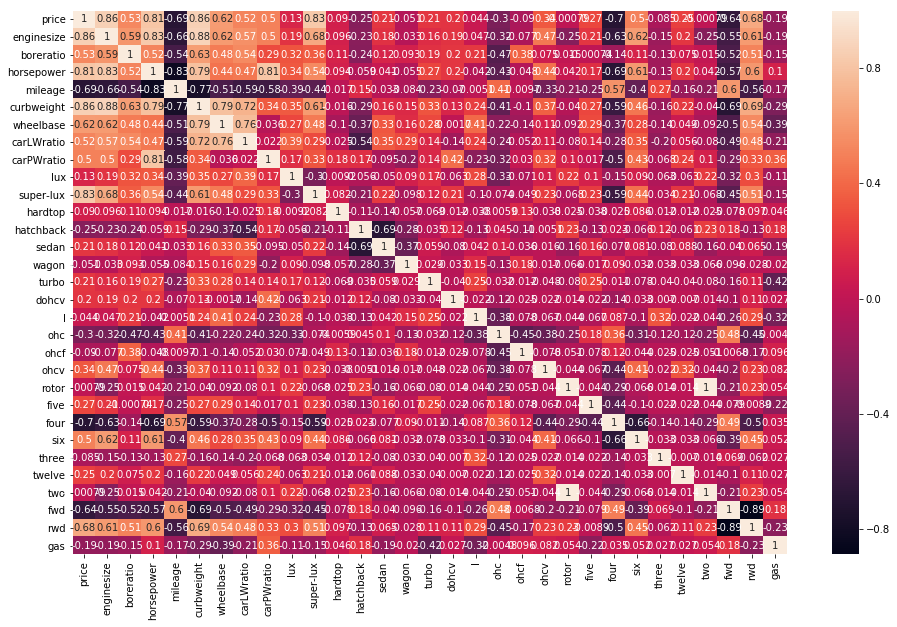

In [428]:
# plotting correlation coefficients to check which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True)

plt.show()

Most highly correlated variables (>0.8) to price are - enginesize, horsepower, curbweight, super-lux

#### Dividing into X and y set for model building

In [429]:
y_train = df_train.pop('price')
X_train = df_train

### Model Building

#### using RFE

In [432]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [433]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [434]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('enginesize', False, 12),
 ('boreratio', False, 5),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('curbweight', True, 1),
 ('wheelbase', False, 9),
 ('carLWratio', False, 6),
 ('carPWratio', True, 1),
 ('lux', False, 8),
 ('super-lux', True, 1),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('turbo', False, 4),
 ('dohcv', False, 13),
 ('l', True, 1),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', False, 7),
 ('rotor', False, 15),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', True, 1),
 ('twelve', False, 11),
 ('two', False, 16),
 ('fwd', False, 10),
 ('rwd', False, 14),
 ('gas', False, 3)]

In [436]:
col = X_train.columns[rfe.support_]

In [437]:
col

Index(['horsepower', 'mileage', 'curbweight', 'carPWratio', 'super-lux',
       'hatchback', 'sedan', 'wagon', 'l', 'ohc', 'ohcf', 'five', 'four',
       'six', 'three'],
      dtype='object')

#### using stats model for detailed analysis

Iteration -1

In [438]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [439]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [440]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [441]:
#Let's see the summary of our linear model (iteration-1)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     133.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.09e-70
Time:                        18:18:05   Log-Likelihood:                 218.48
No. Observations:                 143   AIC:                            -405.0
Df Residuals:                     127   BIC:                            -357.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0381      0.054      0.701      0.4

Iteration-2

Dropping carPWratio as it is insignificant. A p-value > 0.05 implies that a variable is not having significant impact

In [442]:
X_train_new = X_train_rfe.drop(["carPWratio"], axis = 1)

Rebuilding the model without carPWratio

In [443]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [444]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [445]:
#Let's see the summary of our linear model (iteration-2)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     140.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.73e-70
Time:                        18:22:59   Log-Likelihood:                 216.87
No. Observations:                 143   AIC:                            -403.7
Df Residuals:                     128   BIC:                            -359.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0114      0.046     -0.247      0.8

Iteration-3

Dropping three (cylindernumber = three) as it is insignificant. A p-value > 0.05 implies that a variable is not having significant impact

In [446]:
X_train_new = X_train_new.drop(["three"], axis = 1)

Rebuilding the model without cylindernumber = three

In [447]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [448]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [449]:
#Let's see the summary of our linear model (iteration-3)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     150.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.89e-71
Time:                        18:30:16   Log-Likelihood:                 215.71
No. Observations:                 143   AIC:                            -403.4
Df Residuals:                     129   BIC:                            -361.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0190      0.046     -0.412      0.6

Iteration-4

Dropping l (enginetype=l) as it is insignificant. A p-value > 0.05 implies that a variable is not having significant impact

In [451]:
X_train_new = X_train_new.drop(["l"], axis = 1)

KeyError: "['l'] not found in axis"

Rebuilding the model without enginetype=l

In [452]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [453]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [454]:
#Let's see the summary of our linear model (iteration-4)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     160.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.11e-71
Time:                        18:34:00   Log-Likelihood:                 214.25
No. Observations:                 143   AIC:                            -402.5
Df Residuals:                     130   BIC:                            -364.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0220      0.046     -0.475      0.6

Iteration-5

Dropping ohcf (enginetype=ohcf) as it is insignificant. A p-value > 0.05 implies that a variable is not having significant impact

In [456]:
X_train_new = X_train_new.drop(["ohcf"], axis = 1)

Rebuilding the model without enginetype=l

In [457]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [458]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [459]:
#Let's see the summary of our linear model (iteration-5)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     174.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.46e-72
Time:                        18:36:46   Log-Likelihood:                 213.61
No. Observations:                 143   AIC:                            -403.2
Df Residuals:                     131   BIC:                            -367.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0126      0.045     -0.277      0.7

Iteration-6

Dropping ohc (enginetype=ohc) as it is insignificant. A p-value > 0.05 implies that a variable is not having significant impact

In [460]:
X_train_new = X_train_new.drop(["ohc"], axis = 1)

Rebuilding the model without enginetype=ohc

In [461]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [462]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [463]:
#Let's see the summary of our linear model (iteration-6)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     190.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.98e-73
Time:                        18:38:26   Log-Likelihood:                 212.45
No. Observations:                 143   AIC:                            -402.9
Df Residuals:                     132   BIC:                            -370.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0107      0.046     -0.234      0.8

Iteration-7

Dropping five (cylindernumber=five) as it is insignificant. A p-value > 0.05 implies that a variable is not having significant impact

In [464]:
X_train_new = X_train_new.drop(["five"], axis = 1)

Rebuilding the model without cylindernumber=five

In [465]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [466]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [467]:
#Let's see the summary of our linear model (iteration-7)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     209.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.73e-74
Time:                        18:41:21   Log-Likelihood:                 211.51
No. Observations:                 143   AIC:                            -403.0
Df Residuals:                     133   BIC:                            -373.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0281      0.044     -0.640      0.5

The iteration-7 model seems stable, lets analyze VIF

In [468]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.08
1,horsepower,6.13
6,sedan,5.93
5,hatchback,5.54
3,curbweight,4.35
2,mileage,3.93
7,wagon,3.65
8,four,2.71
9,six,2.15
4,super-lux,1.99


The VIF study shows a few variables having high VIFs (>5), from understanding of domain perspective lets remove
sedan

Iteration-8

Dropping sedan (carbody = sedan) as it is insignificant. A p-value > 0.05 implies that a variable is not having significant impact

In [469]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

Rebuilding the model without carbody = sedan

In [470]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [471]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [472]:
#Let's see the summary of our linear model (iteration-8)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     224.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.81e-74
Time:                        18:57:27   Log-Likelihood:                 207.76
No. Observations:                 143   AIC:                            -397.5
Df Residuals:                     134   BIC:                            -370.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0831      0.040     -2.101      0.0

Iteration-9

Dropping wagon (carbody = wagon) as it is insignificant. A p-value > 0.05 implies that a variable is not having significant impact

In [488]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

KeyError: "['wagon'] not found in axis"

Rebuilding the model without carbody = wagon

In [489]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [490]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [491]:
#Let's see the summary of our linear model (iteration-4)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     251.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.40e-74
Time:                        19:05:04   Log-Likelihood:                 205.90
No. Observations:                 143   AIC:                            -395.8
Df Residuals:                     135   BIC:                            -372.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0905      0.040     -2.277      0.0

The iteration-9 model seems stable, lets analyze VIF

In [492]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,64.89
1,horsepower,5.69
3,curbweight,3.97
2,mileage,3.86
6,four,2.68
7,six,2.12
4,super-lux,1.90
5,hatchback,1.25


### Residual Analysis

In [494]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

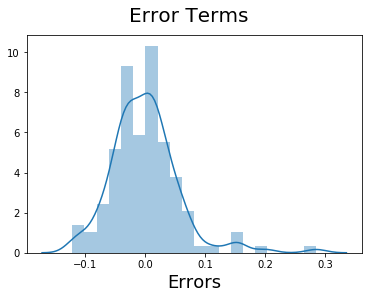

In [495]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms seem to be almost normally distributed, so the models seems to be linear. However, some error variance along the tails meaning model is still not able to explain some variance.

## Making Predictions

#### Applying scaling to test data

In [4]:
# need to apply scaling to all columns which are not converted to dummy variables as they differ in scale (mostly numerical variables)

lst = ['price', 'enginesize', 'boreratio', 'horsepower', 'mileage', 'curbweight', 'wheelbase', 'carLWratio', 'carPWratio']

df_test[lst] = scaler.fit_transform(df_test[lst])

NameError: name 'scaler' is not defined

In [500]:
df_test.describe()

,price,enginesize,boreratio,horsepower,mileage,curbweight,wheelbase,carLWratio,carPWratio,lux,super-lux,hardtop,hatchback,sedan,wagon,turbo,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,fwd,rwd,gas
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.000000,62.000000
mean,0.209644,0.384199,0.667691,0.413655,0.459824,0.371743,0.370121,0.607433,0.343510,0.435484,0.096774,0.080645,0.338710,0.451613,0.096774,0.177419,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.564516,0.419355,0.887097
std,0.210911,0.251200,0.228484,0.282290,0.232966,0.222354,0.179970,0.186206,0.200601,0.499868,0.298064,0.274512,0.477134,0.501716,0.298064,0.385142,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.499868,0.497482,0.319058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.076536,0.226562,0.515873,0.163534,0.259091,0.219125,0.265306,0.541808,0.217347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000
50%,0.136847,0.328125,0.674603,0.364662,0.436364,0.344065,0.327988,0.596078,0.292307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.000000
75%,0.280049,0.513672,0.857143,0.503759,0.600000,0.540726,0.482507,0.723021,0.457450,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [501]:
y_test = df_test.pop('price')
X_test = df_test

In [502]:
# Now let's use our model to make predictions.

# dropping constant
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [503]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

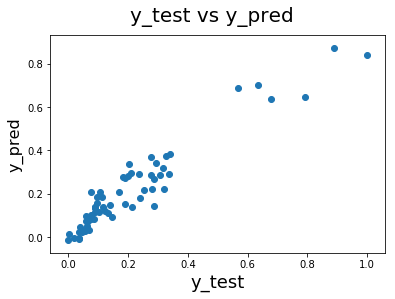

In [505]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [507]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9075085256876817

Inference: 
The spread of y_test vs y_pred shows near linear relationship
The r2 value of the model is high hence it is able to explain a lot of variance
The r2 of test (0.9075) and train (0.929) data is comparable
The F-statistic is 251.7 which is a high value and porb( F-statistic) is very low i.e. model is significant
All the significant variables have acceptable VIFs, the final set of predictors hence can be given as:
-   Features	 VIF
- 0	const	    64.89
- 1	horsepower	5.69
- 3	curbweight	3.97
- 2	mileage	    3.86
- 6	four	    2.68
- 7	six	        2.12
- 4	super-lux	1.90
- 5	hatchback	1.25

It has a good Adj. R-squared value as 0.925, with a good AIC and BIC value.

The final equation of the best fitted line is as below:
price (final equation) = -0.0905 + horsepower*0.3425 + mileage*0.1459 + curbweight*0.3567 + super-lux*0.2650 + hatchback*(-0.0277) + four*(-0.0522) + six*(-0.0722)

The equation gives an overall view of how the price of the car depends upon the variables.

We suggest Geely Auto to consider below points:

1) Price: With average car priced as 13277 and most variations priced around 10295, the auto manufaturer may consider the segment it is planning to enter. This is the most important perspective as it will decide the design and make of the car.
2) carbody - hatchback
3) cylinder - 4 or 6
4) car category - super luxury
5) mileage - needs to be good
6) curbweight - decent
7) horsepower - good
8) symboling - has to be between 0 and -1